# 因子筛选及样本外测试

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')

## 因子数据加载

In [2]:
def get_factor_data(factor_name):

    df = pd.read_csv(f"Factor_csv/{factor_name}.csv",index_col=0)
    df.index = pd.to_datetime(df.index.astype(str))
    df = df.reset_index().melt(id_vars=['trading_date'], var_name='future', value_name=factor_name)
    df_factor = df.set_index(['trading_date','future'])
    return df_factor

In [3]:
factor_names = [f.split('.')[0] for f in os.listdir('Factor_csv') if f.endswith('.csv')]

factor_dfs = []
for name in factor_names:
    factor_df = get_factor_data(name)
    factor_dfs.append(factor_df)

total_factor = pd.concat(factor_dfs,axis=1).reset_index()
total_factor

,trading_date,future,Whole_tide_7,CPV_corr_ret_1_N_vol,Whole_tide_5,Mean_ret_res,Top20_mean_ret_res,Whole_tide_3,Diff_10_20_ret_res,Top10_mean_ret_res,CPV_corr_price_N_vol,ext_ret,CPV_corr_ret_N_vol,CPV_corr_price_1_N_vol,CPV_corr_ret_l1_N_vol,CPV_corr_price_l1_N_vol,Whole_tide_9,Diff_10_mean_ret_res,Diff_top10_bot90
0,2014-01-06,A,0.000095,-0.025733,0.000091,4.138456e-11,2.091214e-10,0.000064,2.048174e-10,4.139388e-10,0.180887,0.002452,0.273923,0.169911,0.248645,0.160366,0.000076,3.725542e-10,4.149738e-10
1,2014-01-07,A,0.000091,0.065811,0.000021,3.665438e-11,1.741601e-10,0.000019,1.378662e-10,3.120263e-10,0.235382,0.002204,0.209760,0.199211,0.211379,0.211807,0.000018,2.753720e-10,3.067262e-10
2,2014-01-08,A,-0.000047,-0.052758,-0.000032,-4.066787e-12,2.970066e-11,-0.000029,-2.738446e-11,2.316209e-12,0.066689,-0.002205,-0.034279,0.056746,0.049811,0.067799,-0.000048,6.382996e-12,7.109773e-12
3,2014-01-09,A,0.000012,-0.029276,-0.000004,9.259098e-11,4.622759e-10,0.000010,3.997857e-10,8.620616e-10,0.130045,0.003282,0.256532,0.090061,0.283957,0.083381,0.000030,7.694706e-10,8.493001e-10
4,2014-01-10,A,0.000072,-0.002572,0.000063,5.363927e-12,-1.471038e-11,0.000046,-3.793153e-11,-5.264191e-11,0.431668,-0.001523,0.039831,0.418709,0.104002,0.432778,0.000072,-5.800584e-11,-6.461046e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111685,2022-12-26,ZN,0.000014,0.212535,0.000016,2.299072e-11,1.102537e-10,0.000017,1.488762e-10,2.591299e-10,NaN,0.002578,0.240694,0.012424,0.288144,-0.000313,0.000013,2.361392e-10,2.626908e-10
111686,2022-12-27,ZN,0.000047,-0.029925,0.000048,5.812647e-12,2.705731e-11,0.000051,1.751355e-11,4.457086e-11,NaN,0.001272,0.062718,0.298107,0.061192,0.377022,0.000042,3.875822e-11,4.170564e-11
111687,2022-12-28,ZN,-0.000013,0.000263,-0.000009,7.212882e-12,4.336747e-11,-0.000014,3.746969e-11,8.083716e-11,NaN,0.001884,0.053190,-0.077654,-0.024839,-0.103124,0.000034,7.362427e-11,8.190260e-11
111688,2022-12-29,ZN,-0.000011,0.047191,-0.000012,-1.074542e-12,-8.763116e-12,-0.000010,2.102668e-12,-6.660448e-12,NaN,-0.001470,-0.013680,0.300380,-0.076134,0.274506,-0.000011,-5.585906e-12,-6.213986e-12


## 因子相关性筛选

In [4]:
df_factor_in_sample = total_factor[total_factor['trading_date']<pd.to_datetime("2022-01-01")].set_index(['trading_date','future'])

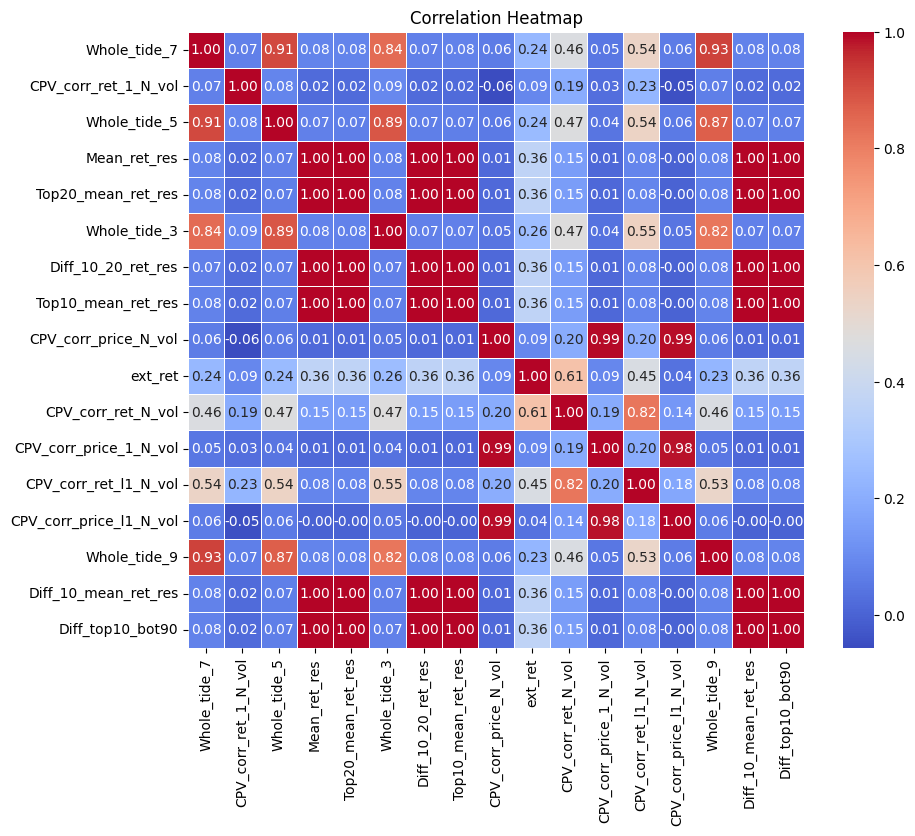

In [5]:
import seaborn as sns

plt.figure(figsize=(10,8))  # 设置画布尺寸[3](@ref)
sns.heatmap(
    df_factor_in_sample.corr(), 
    annot=True,        # 显示数值
    fmt=".2f",         # 数值保留两位小数
    cmap="coolwarm",   # 红蓝渐变色系
    square=True,       # 单元格为正方形
    linewidths=0.5     # 单元格间距线宽[6](@ref)
)
plt.title("Correlation Heatmap")
plt.show()

根据之前的样本内表现来看，同时考虑相关性筛选的标准，我们决定选择以下几个因子：

CPV_corr_ret_1_N_vol、CPV_corr_ret_N_vol、Whole_tide_3、Diff_10_20_ret_res、ext_ret


In [6]:
factor_selected = ['CPV_corr_ret_1_N_vol','CPV_corr_ret_N_vol','Whole_tide_3','Diff_10_20_ret_res','ext_ret']

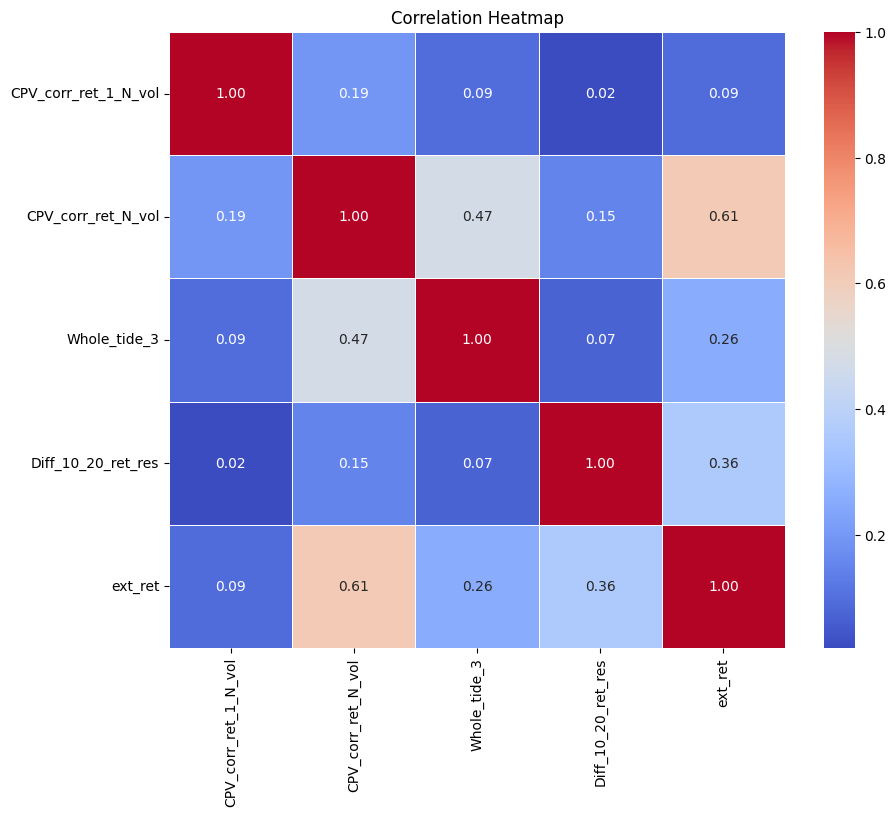

In [7]:
import seaborn as sns

plt.figure(figsize=(10,8))  # 设置画布尺寸[3](@ref)
sns.heatmap(
    df_factor_in_sample[factor_selected].corr(), 
    annot=True,        # 显示数值
    fmt=".2f",         # 数值保留两位小数
    cmap="coolwarm",   # 红蓝渐变色系
    square=True,       # 单元格为正方形
    linewidths=0.5     # 单元格间距线宽[6](@ref)
)
plt.title("Correlation Heatmap")
plt.show()

In [26]:
df_total_factor = total_factor[['trading_date','future']+factor_selected]

In [28]:
df_total_factor[factor_selected] = -1 * df_total_factor[factor_selected]

## OOS回测

### Functions

In [ ]:
from scipy.stats import spearmanr

def get_return_data():
    df_o2o_ret = pd.read_excel('Return_Data.xlsx',sheet_name='RtnsO2O',index_col=0)
    df_o2o_ret.index = pd.to_datetime(df_o2o_ret.index.astype(str))
    df_o2o_ret.columns = df_o2o_ret.columns.str.upper()

    df_o2o_ret_2 = df_o2o_ret.shift(-2).dropna(how='all')
    return df_o2o_ret_2

def get_ins_factor_data(factor_name):
    df_factor = pd.read_csv(f"Factor_csv/{factor_name}.csv",index_col=0)
    df_factor.index = pd.to_datetime(df_factor.index)
    df_factor = df_factor[df_factor.index<pd.to_datetime("2022-01-01")]
    return df_factor

def process_factor_return_data(df_factor,df_return):
    futures_col = sorted(list(set(df_factor.columns).intersection(df_return.columns)))
    date_idx = sorted(list(set(df_factor.index).intersection(df_return.index)))

    df_factor = df_factor.loc[date_idx,futures_col]
    df_return = df_return.loc[date_idx,futures_col]

    return df_factor, df_return

def calc_portfolio_ret(df_factor, df_return):

    df_portfolio_return = pd.DataFrame(index=df_factor.index, columns=['daily_return'])

    for date in df_factor.index.to_list():
        factor_array = np.array(df_factor.loc[date].fillna(0).values)
        return_array = np.array(df_return.loc[date].fillna(0).values)
        factor_position = factor_array / np.sum(abs(factor_array))
        factor_return = factor_position * return_array
        total_return = np.sum(factor_return)

        df_portfolio_return.loc[date,'daily_return'] = total_return

    df_portfolio_return['cumsum_ret'] = df_portfolio_return['daily_return'].cumsum()
    
    return df_portfolio_return

def calc_ic(df_factor,df_return):
    df_rankic = pd.DataFrame(index=df_factor.index,columns=['RankIC'])

    for date in df_factor.index.to_list():
        factor_array = np.array(df_factor.loc[date].fillna(0).values)
        return_array = np.array(df_return.loc[date].fillna(0).values)
        rankic, p_value = spearmanr(factor_array, return_array)
        df_rankic.loc[date,'RankIC'] = rankic

    RankIC_mean = df_rankic['RankIC'].mean()
    RankIC_IR = df_rankic['RankIC'].mean() / df_rankic['RankIC'].std()

    return RankIC_mean, RankIC_IR

def plot_pnl(series):
    # 确保索引是时间类型
    series.index = pd.to_datetime(series.index)
    
    # 分割时间段
    mask_pre = series.index < '2022-01-01'
    mask_post = series.index >= '2022-01-01'
    
    # 计算累计收益
    cumsum_return = series.cumsum()
    
    # 创建画布
    fig, ax = plt.subplots(figsize=(12,6))
    
    # 分时段绘制不同颜色曲线
    cumsum_return[mask_pre].plot(ax=ax, color='steelblue', label='Pre-2022')
    cumsum_return[mask_post].plot(ax=ax, color='crimson', label='Post-2022')
    
    # 计算2022年夏普比率
    year_data = series['2022']
    sharpe_2022 = year_data.mean() * np.sqrt(252) / year_data.std()
    
    # 添加标注
    title = f"OOS Performance | 2022 Sharpe: {sharpe_2022:.2f}"
    ax.set_title(title, fontsize=14, pad=20)
    ax.grid(True)
    ax.legend()
    
    # 优化坐标轴格式
    ax.xaxis.set_tick_params(rotation=45)
    plt.tight_layout()
    plt.show()

def calculate_strategy_metrics(return_series):

    dates = pd.to_datetime(return_series.index.astype(str))
    returns = pd.Series(return_series.values, index=dates, name='daily_return')
    returns = returns.sort_index()
    
    grouped = returns.groupby(returns.index.year)
    
    metrics_df = pd.DataFrame(columns=['年化收益率', '年化夏普比率', '卡玛比率', '最大回撤', '偏度', '峰度'])
    
    for year, year_returns in grouped:
        if len(year_returns) < 1:
            continue  

        # 1. 年化收益率
        cumulative_return = year_returns.cumsum()
        annualized_return = year_returns.mean() * 252
        
        # 2. 年化波动率
        annualized_volatility = year_returns.std() * np.sqrt(252)
        
        # 3. 夏普比率（年化）
        sharpe_ratio = (annualized_return) / annualized_volatility
        
        # 4. 最大回撤
        cum_returns = (1 + year_returns).cumprod()
        peak = cum_returns.expanding(min_periods=1).max()
        drawdown = (peak - cum_returns) / peak
        max_drawdown = drawdown.max()
        
        # 5. 卡玛比率
        calmar_ratio = annualized_return / max_drawdown if max_drawdown != 0 else np.inf
        
        # 6. 偏度/峰度（基于日收益率）
        skewness = year_returns.skew()
        kurtosis = year_returns.kurtosis()
        
        metrics_df.loc[year] = [annualized_return,sharpe_ratio,calmar_ratio,max_drawdown,skewness,kurtosis]
    
    metrics_df = metrics_df.round({
        '年化收益率': 4,
        '年化夏普比率': 2,
        '卡玛比率': 2,
        '最大回撤': 4,
        '偏度': 2,
        '峰度': 2
    })
    
    return metrics_df

### 等权测试

In [49]:
df_total_factor['signal'] = df_total_factor[factor_selected].mean(axis=1)

In [50]:
df_org_factor = df_total_factor.pivot(index='trading_date',columns='future',values='signal')
df_org_return = get_return_data()

df_factor, df_return = process_factor_return_data(df_org_factor,df_org_return)

In [51]:
df_portfolio_return = calc_portfolio_ret(df_factor, df_return)

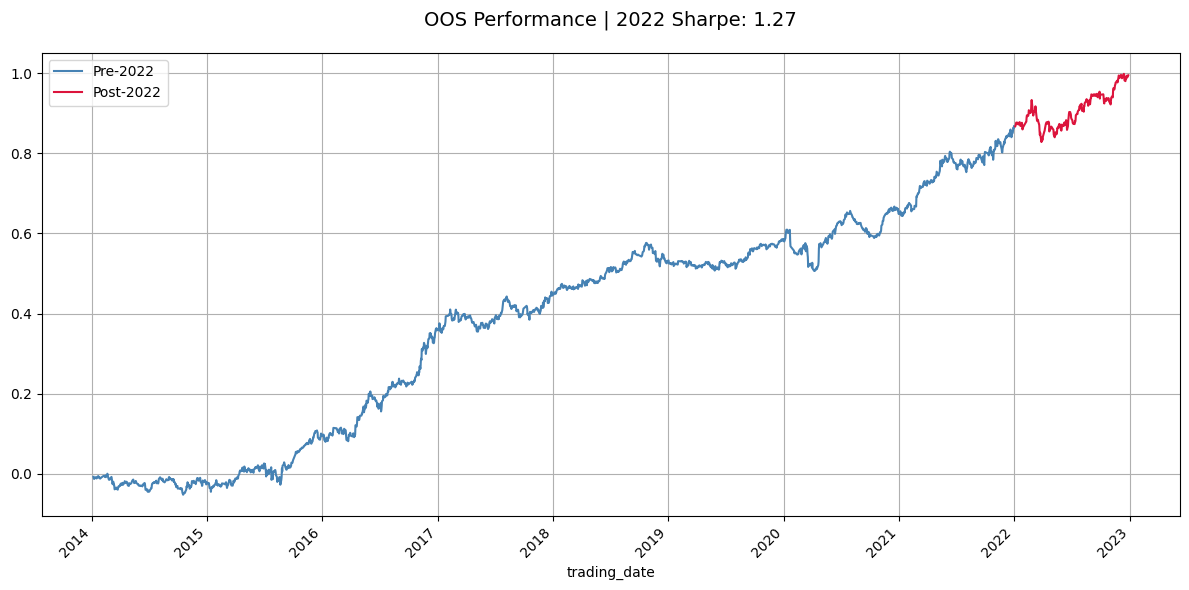

In [52]:
plot_pnl(df_portfolio_return['daily_return'])

In [53]:
calculate_strategy_metrics(df_portfolio_return['daily_return'])

,年化收益率,年化夏普比率,卡玛比率,最大回撤,偏度,峰度
2014,-0.0218,-0.39,-0.42,0.0519,-0.10,0.36
2015,0.1183,1.32,2.24,0.0529,-0.61,5.17
2016,0.2761,2.72,5.63,0.0491,0.28,1.62
2017,0.0865,1.04,1.52,0.0569,-0.05,1.44
2018,0.0898,1.37,1.57,0.0574,-0.08,2.03
2019,0.0567,1.01,2.22,0.0255,-0.06,1.88
2020,0.0646,0.69,0.65,0.0995,0.08,6.23
2021,0.2271,2.30,4.53,0.0501,0.47,1.88
2022,0.1338,1.27,1.33,0.1007,-0.29,1.06


### RankIC加权

In [57]:
rank_ic_dict = {}
rank_ic_ir_dict = {}
for factor in factor_selected:
    df_factor = get_ins_factor_data(factor)
    rank_ic, rank_ic_ir = calc_ic(df_factor,df_return)
    rank_ic_dict[factor] = rank_ic
    rank_ic_ir_dict[factor] = rank_ic_ir

In [63]:
total_ic = sum(abs(weight) for weight in rank_ic_dict.values())
normalized_ic_weights = {factor: abs(ic) / total_ic for factor, ic in rank_ic_dict.items()}

total_ic_ir = sum(abs(weight) for weight in rank_ic_ir_dict.values())
normalized_ic_ir_weights = {factor: abs(ic) / total_ic for factor, ic in rank_ic_ir_dict.items()}

In [67]:
df_total_factor['ic_weight_signal'] = (df_total_factor['CPV_corr_ret_1_N_vol'] * normalized_ic_weights['CPV_corr_ret_1_N_vol']+
                                    df_total_factor['CPV_corr_ret_N_vol'] * normalized_ic_weights['CPV_corr_ret_N_vol']+
                                    df_total_factor['Whole_tide_3'] * normalized_ic_weights['Whole_tide_3']+
                                    df_total_factor['Diff_10_20_ret_res'] * normalized_ic_weights['Diff_10_20_ret_res']+
                                    df_total_factor['ext_ret'] * normalized_ic_weights['ext_ret'])

In [68]:
df_total_factor['ic_ir_weight_signal'] = (df_total_factor['CPV_corr_ret_1_N_vol'] * normalized_ic_ir_weights['CPV_corr_ret_1_N_vol']+
                                    df_total_factor['CPV_corr_ret_N_vol'] * normalized_ic_ir_weights['CPV_corr_ret_N_vol']+
                                    df_total_factor['Whole_tide_3'] * normalized_ic_ir_weights['Whole_tide_3']+
                                    df_total_factor['Diff_10_20_ret_res'] * normalized_ic_ir_weights['Diff_10_20_ret_res']+
                                    df_total_factor['ext_ret'] * normalized_ic_ir_weights['ext_ret'])

In [69]:
df_org_factor = df_total_factor.pivot(index='trading_date',columns='future',values='ic_weight_signal')
df_org_return = get_return_data()

df_factor, df_return = process_factor_return_data(df_org_factor,df_org_return)

In [70]:
df_portfolio_return = calc_portfolio_ret(df_factor, df_return)

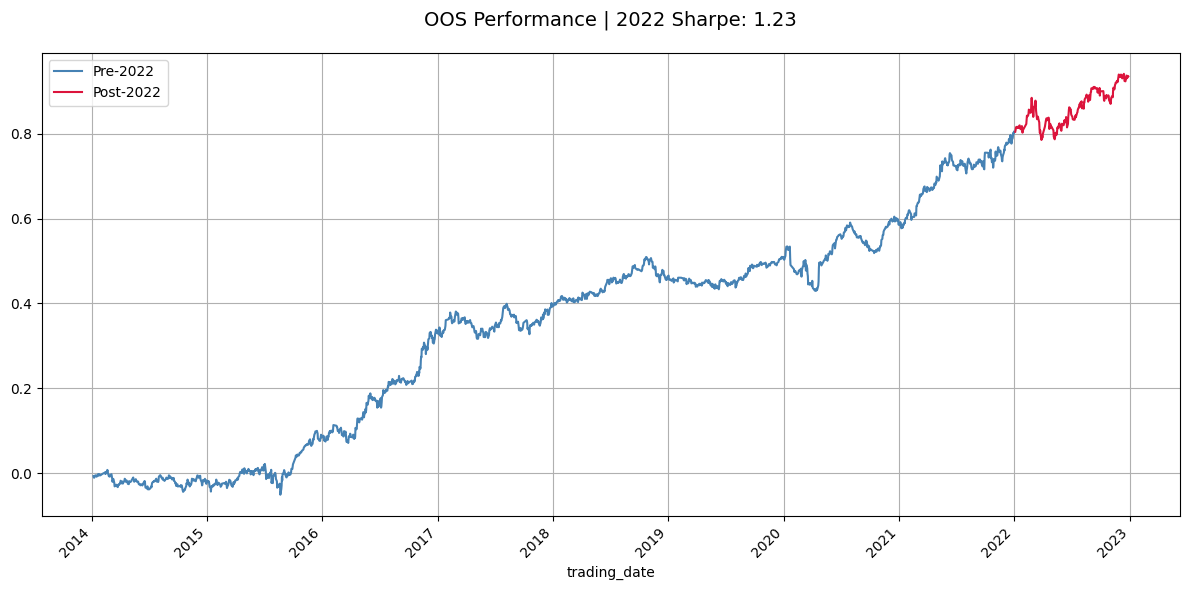

In [71]:
plot_pnl(df_portfolio_return['daily_return'])

In [72]:
calculate_strategy_metrics(df_portfolio_return['daily_return'])

,年化收益率,年化夏普比率,卡玛比率,最大回撤,偏度,峰度
2014,-0.0182,-0.33,-0.36,0.0513,-0.06,0.32
2015,0.1047,1.14,1.47,0.0715,-0.78,4.90
2016,0.2540,2.50,6.10,0.0417,0.11,1.06
2017,0.0645,0.78,0.92,0.0698,-0.06,1.14
2018,0.0723,1.10,1.25,0.0580,0.03,1.72
2019,0.0493,0.87,1.52,0.0325,-0.20,1.37
2020,0.0787,0.82,0.78,0.1011,0.09,4.91
2021,0.2272,2.21,4.82,0.0472,0.55,2.07
2022,0.1373,1.23,1.43,0.0958,-0.32,1.30


### ICIR加权

In [73]:
df_org_factor = df_total_factor.pivot(index='trading_date',columns='future',values='ic_ir_weight_signal')
df_org_return = get_return_data()

df_factor, df_return = process_factor_return_data(df_org_factor,df_org_return)

In [74]:
df_portfolio_return = calc_portfolio_ret(df_factor, df_return)

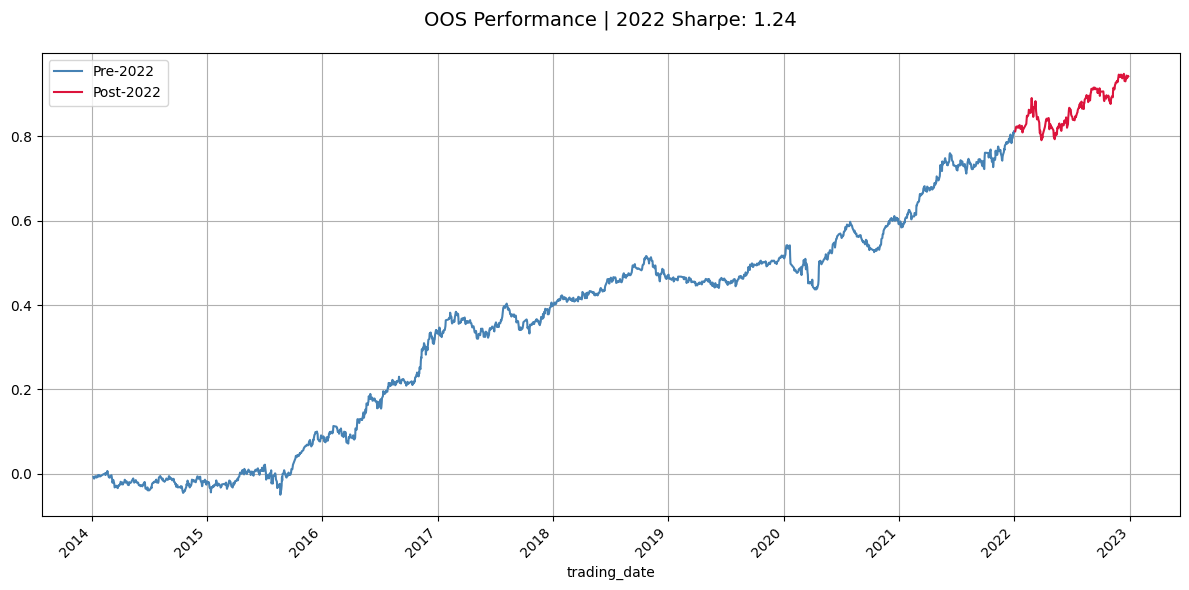

In [75]:
plot_pnl(df_portfolio_return['daily_return'])

In [76]:
calculate_strategy_metrics(df_portfolio_return['daily_return'])

,年化收益率,年化夏普比率,卡玛比率,最大回撤,偏度,峰度
2014,-0.0186,-0.33,-0.36,0.0515,-0.06,0.32
2015,0.1059,1.15,1.51,0.0702,-0.77,4.94
2016,0.2564,2.53,6.23,0.0411,0.12,1.08
2017,0.0663,0.80,0.96,0.0689,-0.05,1.16
2018,0.0740,1.12,1.27,0.0581,0.03,1.75
2019,0.0502,0.88,1.58,0.0318,-0.18,1.41
2020,0.0775,0.81,0.77,0.1013,0.08,5.02
2021,0.2278,2.22,4.79,0.0475,0.54,2.03
2022,0.1372,1.24,1.42,0.0964,-0.32,1.29
